**QSAR Web app_VDR**

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('bioactivity_data_vdr_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.301030
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.522879
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.397940
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.154902
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.460924
494,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.000000
495,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.000000
496,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.075979


In [7]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
494,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
495,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Y = df.pIC50
Y

0      7.301030
1      6.522879
2      6.397940
3      6.154902
4      6.000000
         ...   
493    6.460924
494    5.000000
495    5.000000
496    6.075979
497    6.795066
Name: pIC50, Length: 498, dtype: float64

**Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP193,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP259,PubchemFP261,PubchemFP285,PubchemFP293,PubchemFP299,PubchemFP301,PubchemFP308,PubchemFP334,PubchemFP335,PubchemFP337,PubchemFP338,PubchemFP339,PubchemFP340,PubchemFP341,PubchemFP345,PubchemFP346,PubchemFP351,PubchemFP353,PubchemFP355,...,PubchemFP665,PubchemFP666,PubchemFP667,PubchemFP668,PubchemFP671,PubchemFP672,PubchemFP677,PubchemFP680,PubchemFP683,PubchemFP684,PubchemFP685,PubchemFP686,PubchemFP689,PubchemFP690,PubchemFP692,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP701,PubchemFP704,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP715,PubchemFP734,PubchemFP737,PubchemFP758,PubchemFP767,PubchemFP777,PubchemFP778,PubchemFP797,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP830,PubchemFP839,PubchemFP860
0,1,0,0,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1
2,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1
3,1,1,1,0,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,...,0,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
4,1,0,1,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
494,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
495,0,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
496,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0


In [10]:
X.to_csv('descriptor_list.csv', index = False)

In [11]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

**Random Forest Regression Model**

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9168344500475402

**Model Prediction**

In [14]:
Y_pred = model.predict(X)
Y_pred

array([7.75764098, 6.7318479 , 6.7318479 , 6.1584131 , 6.18427499,
       6.2571665 , 6.31852182, 7.75764098, 5.77418552, 7.75764098,
       7.75764098, 7.75764098, 7.75764098, 7.75764098, 7.75764098,
       7.75764098, 7.75764098, 7.75764098, 7.75764098, 7.75764098,
       7.75764098, 7.75764098, 7.75764098, 7.75764098, 7.75764098,
       7.75764098, 7.75764098, 7.75764098, 7.75764098, 7.75764098,
       7.75764098, 7.75764098, 8.08367519, 8.08367519, 8.17707579,
       8.17707579, 8.17707579, 8.08367519, 8.08367519, 8.17707579,
       8.17707579, 8.17707579, 8.08367519, 8.08367519, 8.17707579,
       8.17707579, 8.08367519, 8.17707579, 8.17707579, 8.17707579,
       8.08367519, 8.08367519, 8.08367519, 8.08367519, 8.17707579,
       8.08367519, 8.08367519, 8.08367519, 8.08367519, 8.17707579,
       8.08367519, 8.08367519, 8.08367519, 8.08367519, 8.17707579,
       8.08367519, 8.08367519, 8.08367519, 8.08367519, 8.17707579,
       8.09055735, 8.09055735, 8.09055735, 8.09055735, 8.21007

**Model Performance**

In [15]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.28
Coefficient of determination (R^2): 0.92


**Data Visualization (Experimental vs Predicted pIC50 for Training Data)**

In [16]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

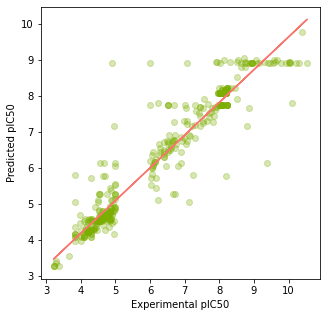

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

**Save Model as Pickle Object**

In [18]:
import pickle

In [20]:
pickle.dump(model, open('vdr_model.pkl', 'wb'))